In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import sys
sys.path.append(r"D:\coding\Jupyter_notebooks\ML")

from credit_risk.read_data import read_data_train
from credit_risk.transform_pipeline import data_prepare_pipeline

In [20]:
data_original = read_data_train()

In [24]:
data = data_prepare_pipeline.fit_transform(data_original.copy())

In [8]:
data["EXT_SOURCE_1"].isna().sum()

0

In [ ]:
# for clusterized income total
dt = pd.DataFrame()
dt["unclusterized"] = data_original["AMT_INCOME_TOTAL"]
dt["clusters"] = data["AMT_INCOME_TOTAL"]

sn.histplot(x="unclusterized", hue="clusters", data=dt.sample(10000))

# clusterization does not help

In [7]:
data["AMT_INCOME_TOTAL"].describe()

count    136763.000000
mean          0.551582
std           0.228697
min           0.000000
25%           0.363868
50%           0.516539
75%           0.745547
max           1.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [4]:
data.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'BUILDING_INFO_AVAILABLE'],
      dtype='object')

In [6]:
data.describe(include="number")

,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS
count,136763.000000,136763.000000,136763.000000,136763.000000
mean,0.551582,0.466733,0.014760,2.114468
std,0.228697,0.254982,0.006929,0.927644
min,0.000000,0.000000,0.000290,1.000000
25%,0.363868,0.265097,0.008625,1.000000
50%,0.516539,0.397646,0.015221,2.000000
75%,0.745547,0.684720,0.019689,3.000000
max,1.000000,1.000000,0.026392,20.000000


In [15]:
upper_quartile = data["CNT_FAM_MEMBERS"].describe()["75%"]

In [17]:
data[data["CNT_FAM_MEMBERS"] > upper_quartile].count()

TARGET                         22839
NAME_CONTRACT_TYPE             22839
FLAG_OWN_CAR                   22839
FLAG_OWN_REALTY                22839
AMT_INCOME_TOTAL               22839
AMT_CREDIT                     22839
NAME_INCOME_TYPE               22839
NAME_EDUCATION_TYPE            22839
NAME_FAMILY_STATUS             22839
NAME_HOUSING_TYPE              22839
REGION_POPULATION_RELATIVE     22839
CNT_FAM_MEMBERS                22839
REGION_RATING_CLIENT_W_CITY    22839
REG_REGION_NOT_LIVE_REGION     22839
REG_REGION_NOT_WORK_REGION     22839
LIVE_REGION_NOT_WORK_REGION    22839
REG_CITY_NOT_LIVE_CITY         22839
REG_CITY_NOT_WORK_CITY         22839
LIVE_CITY_NOT_WORK_CITY        22839
BUILDING_INFO_AVAILABLE        22839
dtype: int64

In [13]:
data["CNT_FAM_MEMBERS"].value_counts()

2.0    67086
1.0    34336
3.0    22839
4.0    10722
5.0     1780
Name: CNT_FAM_MEMBERS, dtype: int64

In [16]:
data["NAME_FAMILY_STATUS"].unique()

['Single / not married', 'Civil marriage', 'Married', 'Widow', 'Separated']
Categories (5, object): ['Single / not married', 'Civil marriage', 'Married', 'Widow', 'Separated']

In [ ]:
sn.countplot(x="TARGET", hue="NAME_FAMILY_STATUS", data=data)

In [ ]:
data["NAME_FAMILY_STATUS"].value_counts()

In [ ]:
sn.pairplot(data.select_dtypes("number"))

In [ ]:
sn.countplot(x="CODE_GENDER", data=data)

In [ ]:
np.where(data["CODE_GENDER"] == "XNA")

<AxesSubplot:xlabel='TARGET', ylabel='count'>

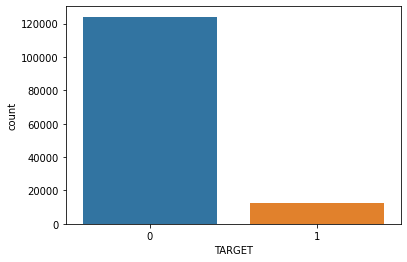

In [9]:
sn.countplot(x="TARGET", data=data)

In [ ]:
feat_income_total = "AMT_INCOME_TOTAL"
sn.violinplot(x=feat_income_total, data=data)

In [ ]:
sn.boxplot(x=feat_income_total, data=data)

In [ ]:
data[feat_income_total].describe()

In [ ]:
data.columns

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Count'>

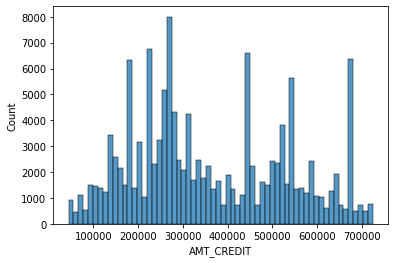

In [22]:
sn.histplot(x="AMT_CREDIT", data=data)

In [ ]:
data["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts()

In [ ]:
data["DEF_60_CNT_SOCIAL_CIRCLE"].describe()

In [ ]:
data["AMT_CREDIT"].describe()

In [ ]:
sn.countplot(x="DEF_60_CNT_SOCIAL_CIRCLE", hue="TARGET", data=data[data["DEF_60_CNT_SOCIAL_CIRCLE"] > 0])

# drop DEF_60_CNT_SOCIAL_CIRCLE

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='count'>

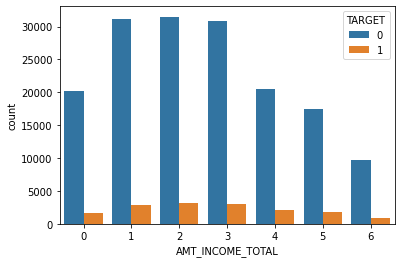

In [15]:
sn.countplot(x="AMT_INCOME_TOTAL", hue="TARGET", data=data)

<AxesSubplot:xlabel='REGION_POPULATION_RELATIVE'>

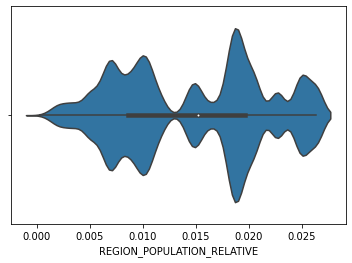

In [10]:
sn.violinplot(x="REGION_POPULATION_RELATIVE", data=data)

<AxesSubplot:xlabel='REGION_POPULATION_RELATIVE', ylabel='count'>

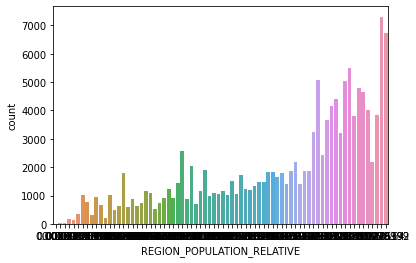

In [11]:
sn.countplot(x="REGION_POPULATION_RELATIVE", data=data)

In [12]:
counts = data["REGION_POPULATION_RELATIVE"].value_counts(bins=100)

In [13]:
counts[counts > 0]

(0.0186, 0.0188]         7604
(0.0251, 0.0253]         7303
(0.0261, 0.0264]         6745
(0.00708, 0.00734]       6699
(0.0191, 0.0193]         5497
(0.00995, 0.0102]        5148
(0.0144, 0.0146]         5111
(0.0105, 0.0107]         5088
(0.0152, 0.0154]         5061
(0.0188, 0.0191]         5046
(0.0201, 0.0204]         4782
(0.0206, 0.0209]         4635
(0.018, 0.0183]          4162
(0.0225, 0.0227]         4017
(0.00943, 0.00969]       4010
(0.00682, 0.00708]       4010
(0.0246, 0.0248]         3848
(0.0196, 0.0199]         3796
(0.00838, 0.00864]       3688
(0.0178, 0.018]          3649
(0.0115, 0.0118]         3261
(0.00916, 0.00943]       2966
(0.0165, 0.0167]         2447
(0.00473, 0.00499]       2433
(0.0227, 0.023]          2192
(0.0107, 0.011]          2181
(0.00655, 0.00682]       2134
(0.00499, 0.00525]       2122
(0.00786, 0.00812]       2060
(0.0102, 0.0105]         1643
(0.0029, 0.00316]        1638
(0.00629, 0.00655]       1636
(0.00603, 0.00629]       1605
(0.00368, 

<AxesSubplot:>

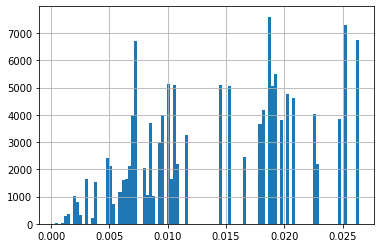

In [14]:
data["REGION_POPULATION_RELATIVE"].hist(bins=100)

In [15]:
from pandas.api.types import is_categorical_dtype

def columns_boxplot(df, columns):
    fig, axis = plt.subplots(nrows=len(columns))
    fig.set_size_inches(10, 5 * len(columns))
    for col, i in zip(columns, range(len(columns))):
        sn.boxplot(x=col, data=df, ax=axis[i])

def columns_countplot(df, columns, hue="TARGET"):
    fig, axis = plt.subplots(nrows=len(columns))
    fig.set_size_inches(10, 5 * len(columns))
    for col, i in zip(columns, range(len(columns))):
        if is_categorical_dtype(df[col]):
            sn.countplot(x=col, hue=hue, data=df, ax=axis[i])
        else:
            sn.histplot(x=col, hue=hue, data=df, ax=axis[i], bins=100)


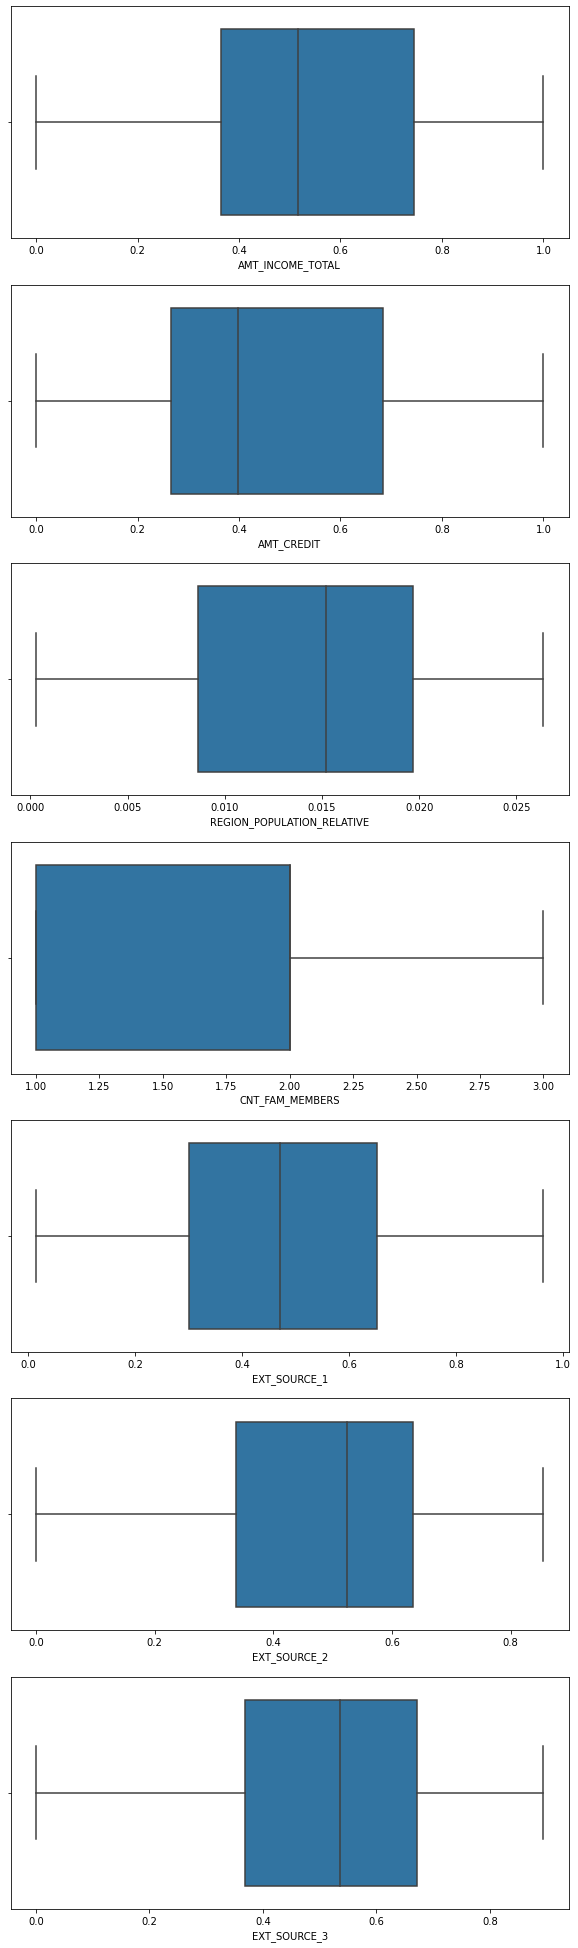

In [6]:
columns_boxplot(data, data.select_dtypes("number").columns)

In [7]:
category_columns = data.select_dtypes("category").columns
category_columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'],
      dtype='object')

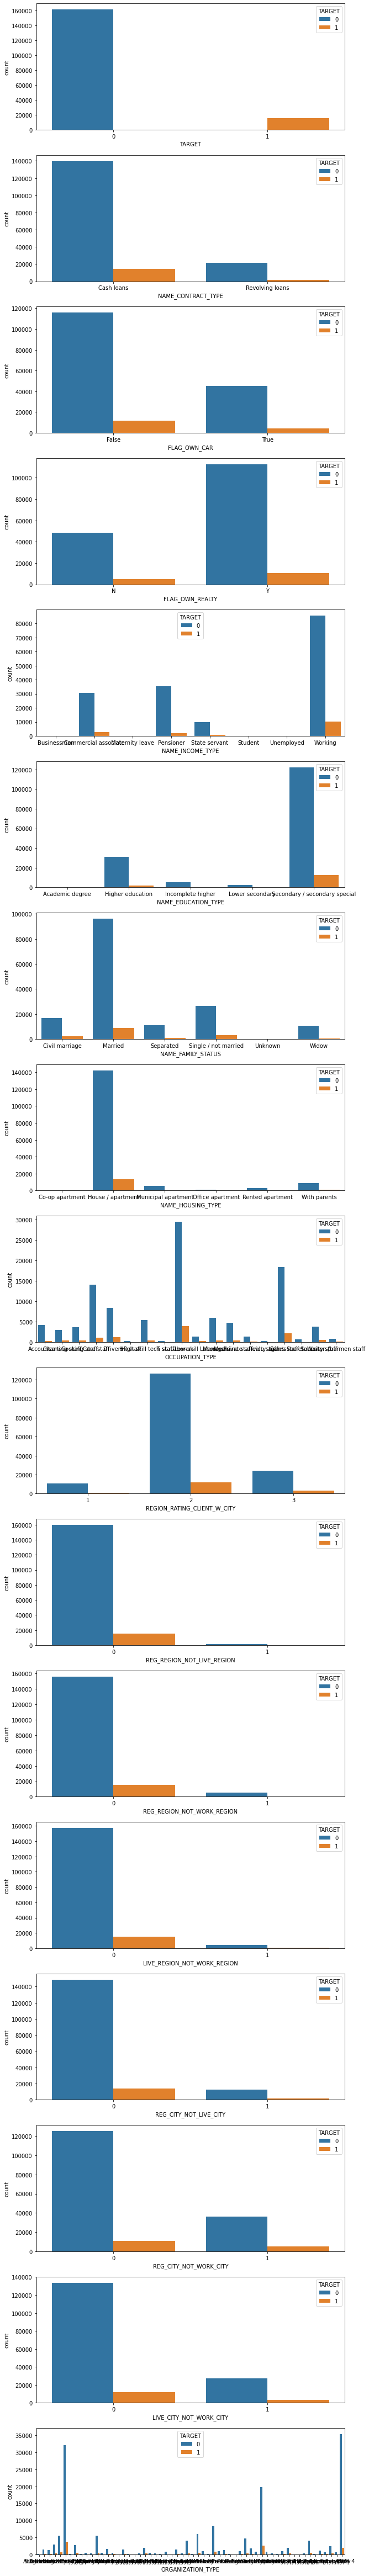

In [56]:
columns_countplot(data, category_columns)

In [77]:
from credit_risk.transform_pipeline import UpsampleByTarget

data_up = UpsampleByTarget("TARGET").transform(data)
data_up["TARGET"].value_counts()

0    124141
1    124141
Name: TARGET, dtype: int64

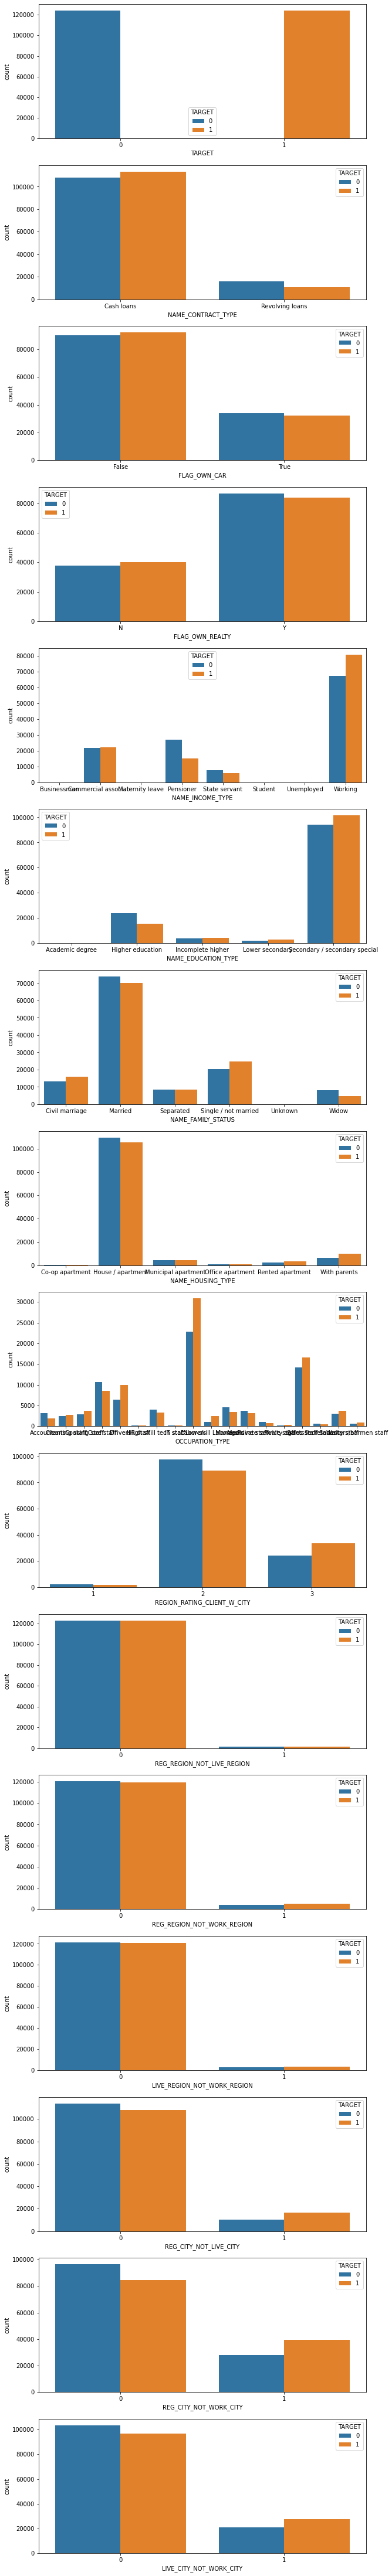

In [78]:
columns_countplot(data_up, category_columns)

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='count'>

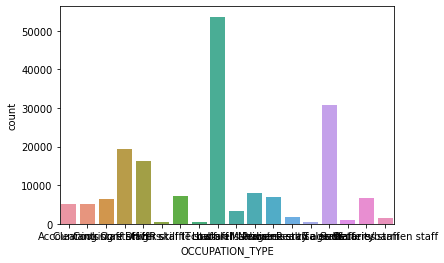

In [81]:
sn.countplot(x="OCCUPATION_TYPE", data=data_up)

In [82]:
data["OCCUPATION_TYPE"].unique()

['Laborers', 'Core staff', NaN, 'Drivers', 'Private service staff', ..., 'Cooking staff', 'Low-skill Laborers', 'Realty agents', 'HR staff', 'IT staff']
Length: 19
Categories (18, object): ['Laborers', 'Core staff', 'Drivers', 'Private service staff', ..., 'Low-skill Laborers', 'Realty agents', 'HR staff', 'IT staff']

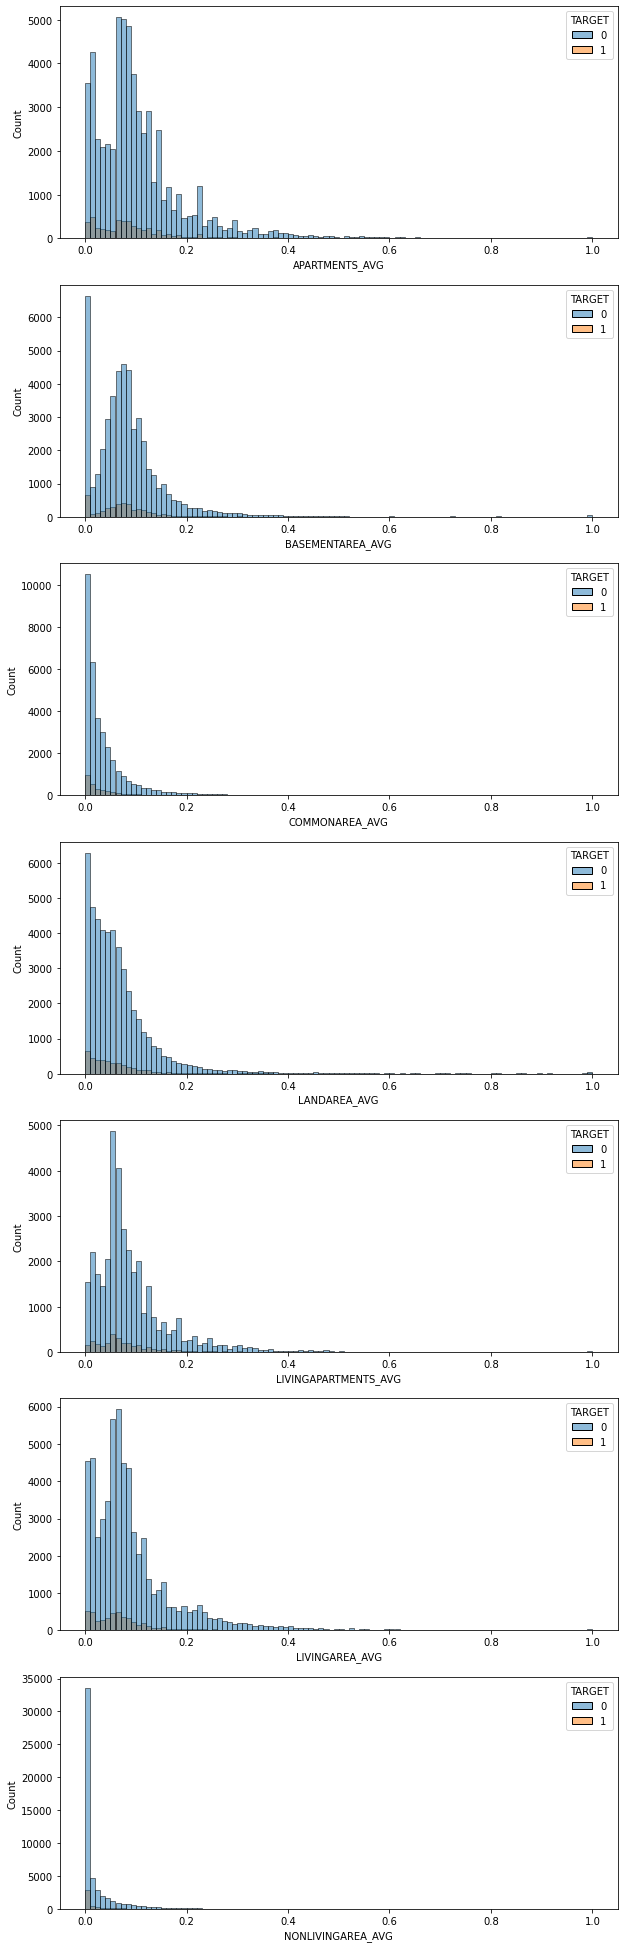

In [22]:
building_cols = ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'COMMONAREA_AVG',
                 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
                 'NONLIVINGAREA_AVG']

columns_countplot(data, building_cols)


In [25]:
for col in building_cols:
    print(data[col].isna().sum())


0
0
0
0
0
0
0
